Interactive Plot

In [38]:
%matplotlib widget

In [39]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

### Task 1: Simple random number generator

One of the simplest random number generators is the linear congruential generator that generates a new number $x_{n+1}$ from the previous one $x_n$ using
$$
x_{n+1} = (a x_n + c) \bmod m
$$
where $a$ and $c$ are integers and $m$ is typically a large prime (and $\bmod$ means modulo arithmetic—done in Python with the `%` sign). By dividing the resulting number by $m$, you get a real number between $0$ and $1$. Through a judicious choice of $a$, $c$, and $m$, this sequence can have a relatively long period and show few correlations. Correlations can be seen by plotting $x_{n+1}$ versus $x_n$. Poor random number generators will show correlated bands and do not uniformly cover the plane of $(x_n, x_{n+1})$ (though sometimes you must look in 3D—i.e., $(x_n, x_{n+1}, x_{n+2})$—and plot three consecutive points to see banding). Let’s look at how the linear congruential generator performs.


In [40]:
# 2. 

x0 = 1 # Seed
# Generate the next 12 numbers 
a,c,m = 12,0,143

x =[x0]

# Pseudo:
# Take the seed or the previous Number
# Apply the equation
# Go to next formula


for i in range(12):
    x.append( (a*x[-1]+c)  % m)

print(x)

[1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1]


3. The pattern repeats ever 2 elements. 

First our seed is 1 so
Variable is 1, 
- we do (12*1 + 0) mod 143, the remander is 12 (Appened to list)

So our second element is, 12 now
- Again we do, (12*12 + 0) mod 143 that is 1
So we again get the seed 1. So this keep on going in a loop

In [41]:
# 4. 

def linCon(xi,a,c,m):
    return ((a*xi) +c)  % m

In the 1970’s and 80’s, a popular choice for parameters was a = 65,539, c = 0, and m = 2^31. This
generator was called “Randu” and was frequently used in research.

In [42]:
# 5. Make 1000 Pseudo Random numbers using Randu 

x0 = 42 # Seed
x = [x0]

m = 2**31
for i in range(1000-1): # 1000-1 becase the instructions said,
    # Make a list of 1000 numbers starting with the seed. So including seed there must be 1000 numbers
    x.append(linCon(xi=x[-1],a=65539, c=0,m=m))
x = np.array(x)/m
print(x[:50])

len(x)


[1.95577741e-08 1.28179695e-03 7.69060571e-03 3.46074617e-02
 1.38429319e-01 5.19108756e-01 8.68788672e-01 5.40753222e-01
 4.25421287e-01 6.85748725e-01 2.85700765e-01 5.42466066e-01
 6.83489506e-01 2.18742444e-01 1.61049110e-01 9.97612662e-01
 5.36233981e-01 2.38889932e-01 6.07233760e-01 4.93393174e-01
 4.95255207e-01 5.30992671e-01 7.28659165e-01 5.93020952e-01
 1.93228014e-04 6.63970797e-01 9.82085732e-01 9.16777215e-01
 6.61891703e-01 7.20355286e-01 3.65106386e-01 7.07440740e-01
 9.58686967e-01 3.85155140e-01 6.82748136e-01 6.30092553e-01
 6.35822092e-01 1.44099577e-01 1.42198634e-01 5.56295610e-01
 5.79859512e-02 3.41255217e-01 5.25657740e-01 8.26494908e-02
 7.64977281e-01 8.46018269e-01 1.91314084e-01 5.33720083e-01
 4.80493744e-01 7.94817200e-02]


1000

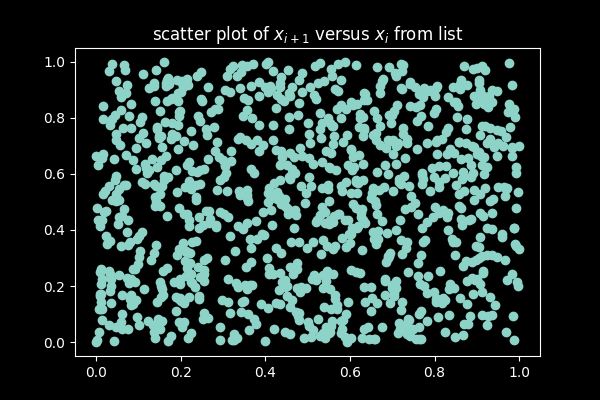

In [43]:
# 6.  

plt.figure(figsize=(6,4))
plt.scatter(x[:-1],x[1:])
plt.title("scatter plot of $x_{i+1}$ versus $x_i$ from list")
plt.show()


In [44]:
len(x[:])
len(x[1:])

999

ANS: Yes they do Look random, there are no visible bands and they seem to uniformly conver the plane

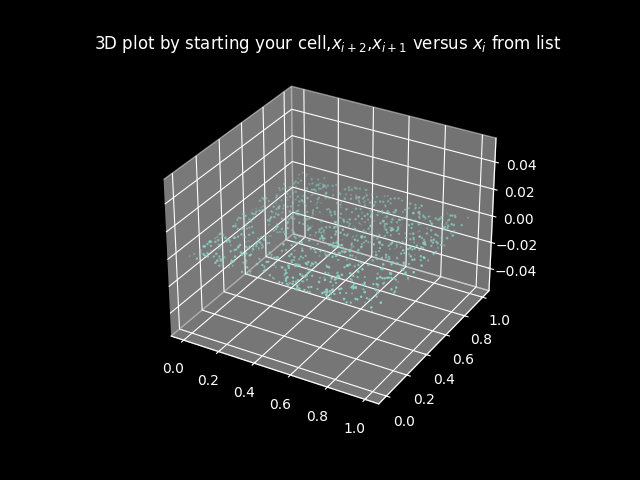

In [45]:
# 8. 3D plot

plt.figure() # Argues that this is a new plot
plt.subplot(projection="3d")
plt.scatter(x[:-2],x[1:-1],x[2:])
plt.title("3D plot by starting your cell,$x_{i+2}$,$x_{i+1}$ versus $x_i$ from list")
plt.show()


RANDU shows that all the values line on a thin plane at z = 0, Hence no, the values are not all Random in 3D. They are high predictable

Points collapse onto a small number of parallel planes in 3D, not volume-filling!

In [46]:
# To turn off the interactive widget
%matplotlib inline 

---
### Task 2

In [47]:
from timeit import default_timer as timer
import functools

# I always wanted to use decorators, so here is my attempt
# Explanation for how this works, "allows a function (the decorator) to 
# wrap and modify or extend the behavior of another function or method without 
# changing its source code"

# Example here, I was able to have a wrapper function that calculates how long a particular
# function takes, and I can input an entire functions into it

def time_taken(func):
    @functools.wraps(func)
    def wrapper(*args):
        start = timer() # Stat here

        result = func(*args) # My Process I want to time

        end = timer() # Ending with this
        time_taken = end - start # seconds
        return time_taken,result
    
    return wrapper


@time_taken
def lst_random(nos):
    return [np.random.random() for i in range(nos)]


calling_it_10000_time,calling_it_10000_data = lst_random(10_000)


print(f"it took {calling_it_10000_time}seconds when called 10,000 times")

it took 0.0045677999733015895seconds when called 10,000 times


In [48]:
# 2.
# Healthy Replacement for ? np.random.random

print(np.random.random.__doc__) 



        random(size=None)

        Return random floats in the half-open interval [0.0, 1.0). Alias for
        `random_sample` to ease forward-porting to the new random API.
        


In [49]:
# 2. Cont...

random_lst = np.random.random(10_000)
len(random_lst)

@time_taken
def single_call_random_number(nos):
    return np.random.random(nos)

calling_it_once_time,calling_it_once_data = single_call_random_number(10_000)

print(f"it took {calling_it_once_time}seconds when called once")

it took 0.00011250004172325134seconds when called once


In [50]:
# 3. 

print(f"Calling it once is {calling_it_10000_time/calling_it_once_time} times faster")



Calling it once is 40.60265137090632 times faster


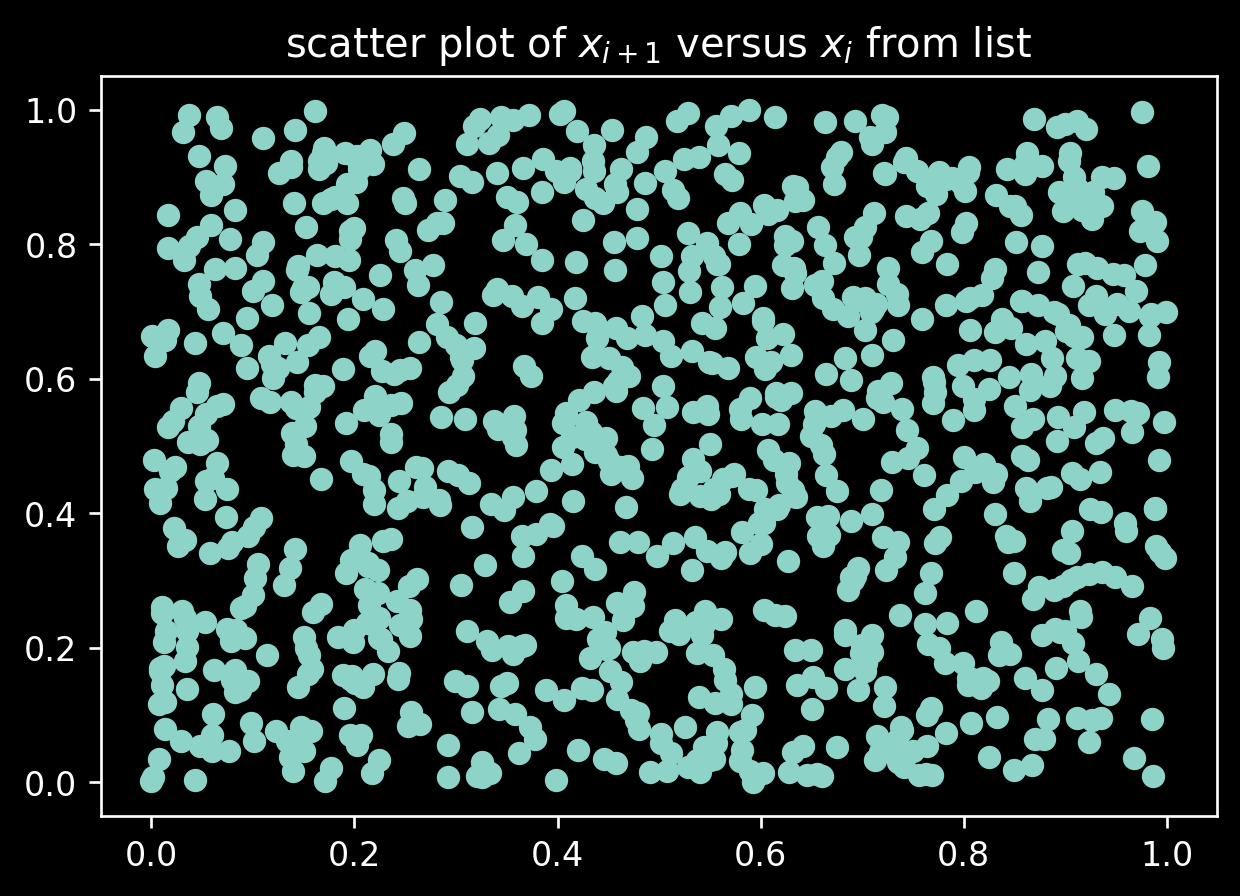

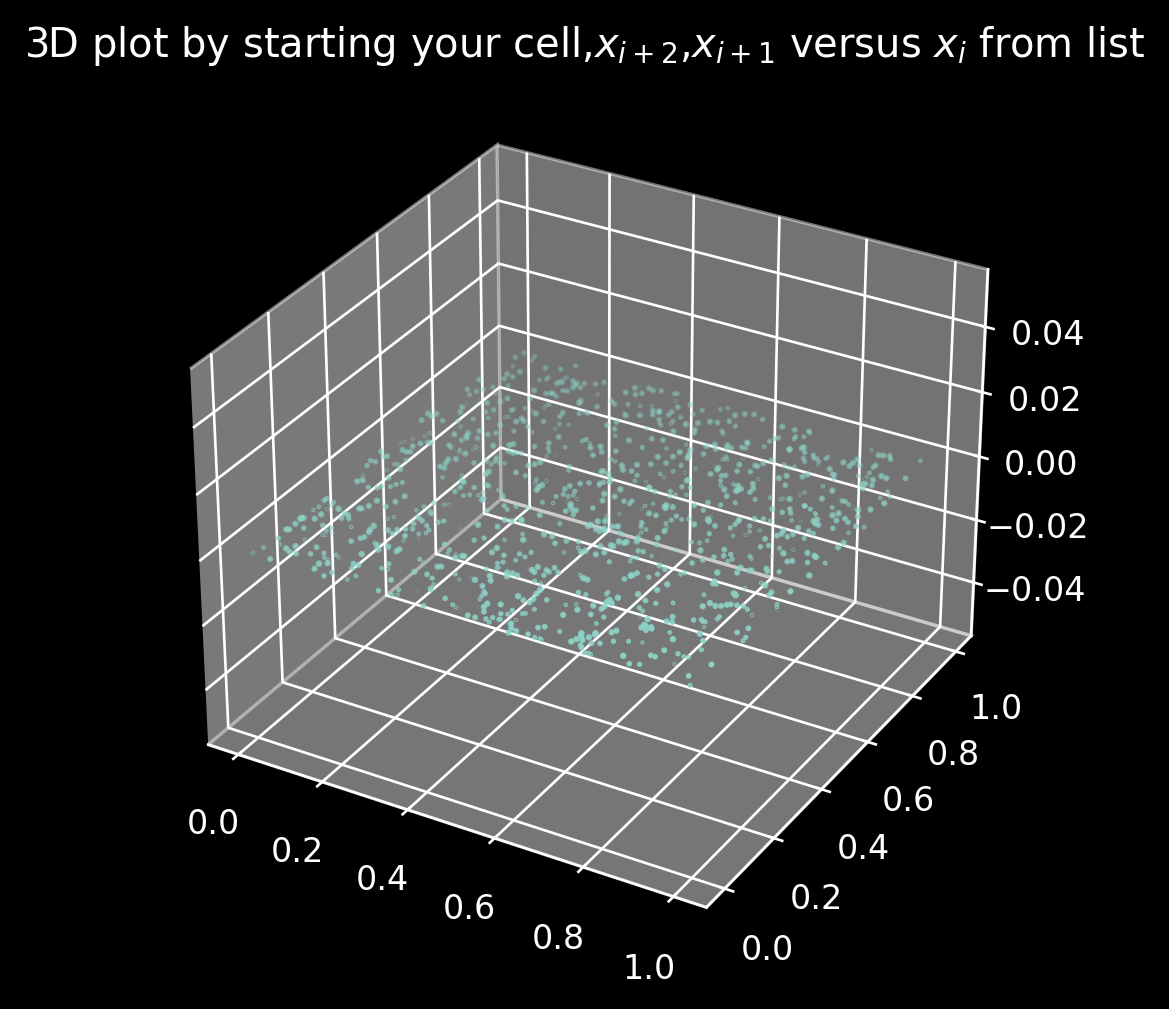

<Figure size 640x480 with 0 Axes>

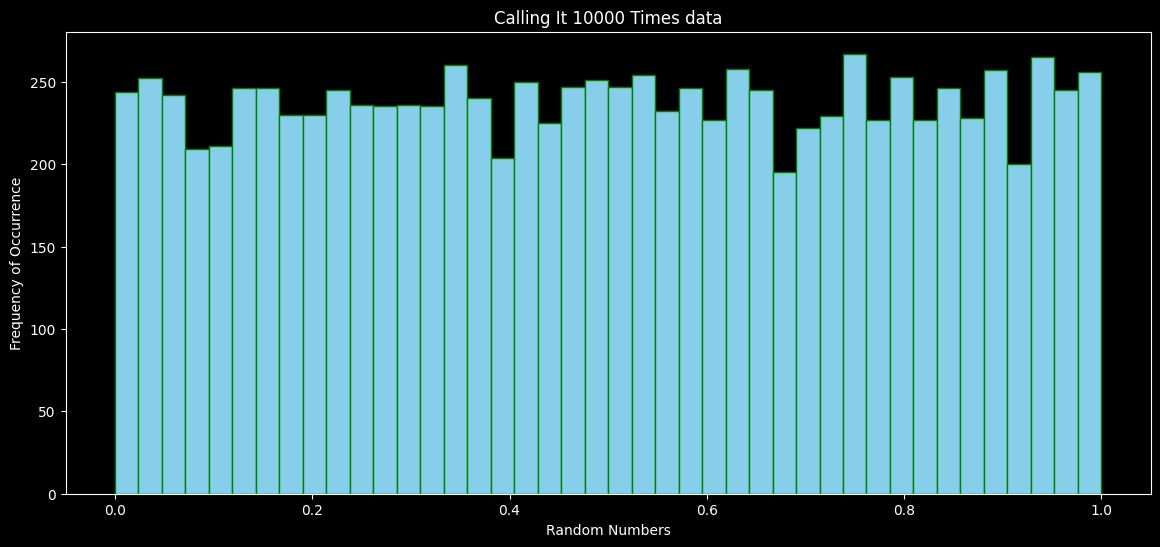

In [51]:
# 4. 

plt.figure()
plt.figure(figsize=(14,6))
plt.hist(calling_it_10000_data, bins=42,color="skyblue",edgecolor='green')
plt.ylabel("Frequency of Occurrence")
plt.xlabel("Random Numbers")
plt.title("Calling It 10000 Times data")
plt.show()


5. 

Starting with too many binds, we just see all the numbers and none of the are grouped.

It looks as excepted, there is not any accumulation of values in any bin, there is no "preferred" number the software chooses, so it does largely look random.


6.

Using Poisson counting statistics, the relative bin-to-bin fluctuation for a histogram bin with $n$ counts is approximately
$$
\frac{1}{\sqrt{n}}.
$$

Requiring the relative fluctuation to be less than or equal to $5\%$,
$$
\frac{1}{\sqrt{n}} \le 0.05,
$$
gives
$$
n \ge 400
$$
counts per bin.

With a total of $N = 10{,}000$ uniformly distributed samples and $B$ histogram bins, the expected number of counts per bin is
$$
n \approx \frac{N}{B}.
$$

Requiring $n \ge 400$ therefore gives
$$
\frac{N}{B} \ge 400 \quad \Rightarrow \quad B \le \frac{10{,}000}{400} = 25.
$$

Hence, the maximum number of bins that keeps relative bin-to-bin fluctuations below $5\%$ is
$$
B_{\max} = 25.
$$

**Source:** (Bevington & Robinson, *Data Reduction and Error Analysis for the Physical Sciences*).


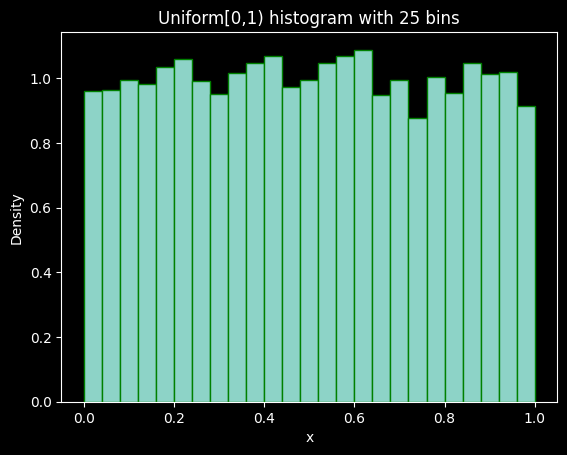

In [52]:
# 6. cont...

plt.figure()
plt.hist(calling_it_once_data, bins=25, density=True,edgecolor='green')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Uniform[0,1) histogram with 25 bins")
plt.show()


---
### Task 3

Going to simulate a stochastic process and show that a histogram of a sample of randomly generated data matches the known statistical distribution for the process.

Use Python to generate random numbers that are sampled from a variety of known distributions.

**Radioactive decay**
An unstable nucleus has a probability r per unit time for turning into a different
isotope. If one watches such a first-order decay process (a death process) and records how long it took
for each decay to happen, one has a list of decay times.


#### 1. Derivation of the decay probability distribution



Let $P_{\text{not yet}}(t)$ be the probability that a radioactive decay has **not occurred** up to time $t$.

We are given that $r\,\Delta t$ is the probability that a decay occurs in a small time interval $\Delta t$.

**Probability of *not* decaying in a small interval**

If the probability that a decay occurs in $\Delta t$ is $r\,\Delta t$, then the probability that a decay **does not** occur in $\Delta t$ is $1 - r\,\Delta t$.

**Survival to $t + \Delta t$**

For the nucleus to survive until time $t+\Delta t$:

- it must not have decayed up to time $t$, and  
- it must not decay in the interval $\Delta t$.

Therefore,
$$
P_{\text{not yet}}(t+\Delta t) = P_{\text{not yet}}(t)\,(1 - r\,\Delta t).
$$

**Forming the differential equation**  
Subtract $P_{\text{not yet}}(t)$ from both sides:
$$
P_{\text{not yet}}(t+\Delta t) - P_{\text{not yet}}(t)= - r\,\Delta t\, P_{\text{not yet}}(t).
$$
Divide by $\Delta t$:
$$
\frac{P_{\text{not yet}}(t+\Delta t) - P_{\text{not yet}}(t)}{\Delta t} = - r\, P_{\text{not yet}}(t).
$$
**Notice this is the forward difference, i.e., a numerical approximation to the first derivative.**

Taking the limit $\Delta t \to 0$ gives
$$
\frac{dP_{\text{not yet}}}{dt} = -r\,P_{\text{not yet}}(t).
$$

**Solving for $P_{\text{not yet}}(t)$**  
Separating variables:
$$
\frac{dP_{\text{not yet}}}{P_{\text{not yet}}} = -r\,dt.
$$
Integrating and exponentiating:
$$
P_{\text{not yet}}(t) = C e^{-rt}.
$$
Using the condition that the decay has not occurred at $t=0$ ($P_{\text{not yet}}(0) = 1$) gives $C=1$, so
$$
P_{\text{not yet}}(t) = e^{-rt}.
$$

**Relating $P_{\text{not yet}}(t)$ to $p_{\text{now}}(t)$**

The probability that the decay occurs **at time $t$** is the probability that it has not yet occurred by time $t$, but does occur immediately after. Thus the probability density is
$$
p_{\text{now}}(t) = -\frac{d}{dt} P_{\text{not yet}}(t) = r e^{-rt}.
$$

**Final result**
$$
p_{\text{now}}(t) = r e^{-rt}.
$$


In [53]:
# 2. 

r = 1
dt = 0.1 # Delta t

print(f"r * dt= {r*dt}")

@time_taken
def decay_simulation(nos):
    decay_times = []
    for i in range(nos):
        t = 0
        while True:
            if np.random.random() < r * dt:
                decay_times.append(t)
                break
            t += dt


    return decay_times

decay_time_taken,decay_times = decay_simulation(10_000)
print(f"Simulation Took: {decay_time_taken:3f} seconds ")

print(decay_times[:5])
print(len(decay_times))


r * dt= 0.1
Simulation Took: 0.037382 seconds 
[0.7999999999999999, 0.2, 0.8999999999999999, 1.0999999999999999, 0.30000000000000004]
10000


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ahila\AppData\Local\Temp\ipykernel_27892\2222975506.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"r={r}   $\Delta t={dt}$")


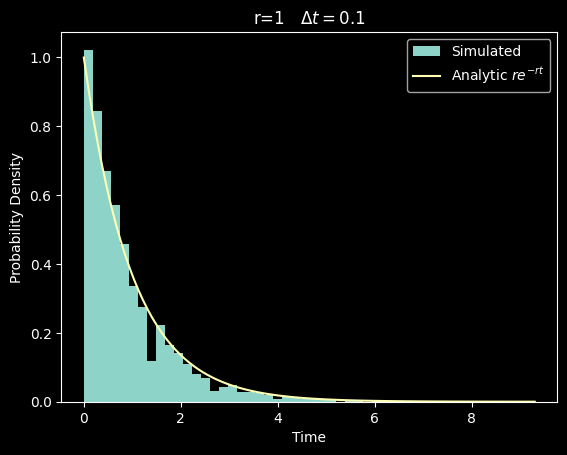

In [54]:
# 3. 

plt.figure()
# density=True for normalized probability density
plt.hist(decay_times, density=True, bins=50, label="Simulated")

t = np.linspace(0, max(decay_times), 100)
p_analytic = r * np.exp(-r * t)

plt.plot(t, p_analytic, '-', label="Analytic $re^{-rt}$")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.title(f"r={r}   $\Delta t={dt}$")
plt.legend()
plt.show()

ANS: They Mostly Agree, Except a few places, like at time 0, where they largely diverge, usually the analytical line is able to predict the trend.

<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:76: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:76: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ahila\AppData\Local\Temp\ipykernel_27892\481941872.py:36: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"r={r}   $\Delta t={dt}$")
C:\Users\ahila\AppData\Local\Temp\ipykernel_27892\481941872.py:76: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"r={r}   $\Delta t={dt}$")


r * dt= 0.01
Simulation Took: 0.04413689998909831 seconds 


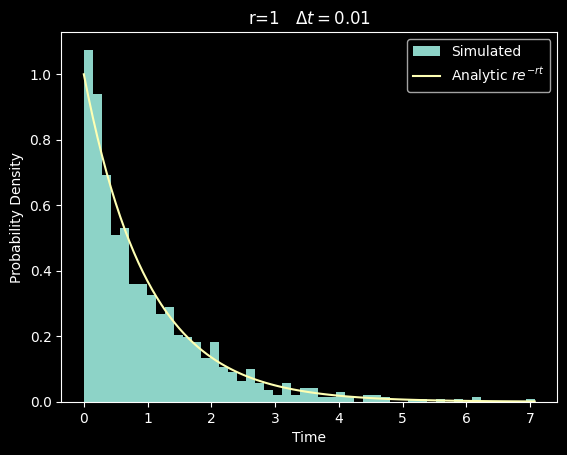

r * dt= 0.001
Simulation Took: 0.4094269999768585 seconds 


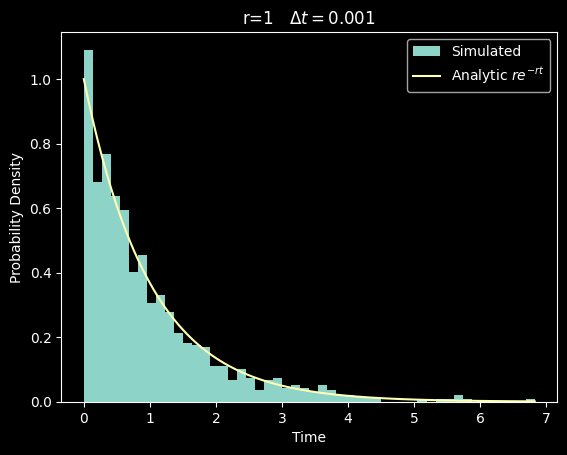

In [55]:
# 4. 


r = 1
dt = 0.01 # Delta t

print(f"r * dt= {r*dt}")

@time_taken
def decay_simulation(nos):
    decay_times = []
    for i in range(nos):
        t = 0
        while True:
            if np.random.random() < r * dt:
                decay_times.append(t)
                break
            t += dt


    return decay_times

decay_time_taken, decay_times = decay_simulation(1000)
print(f"Simulation Took: {decay_time_taken} seconds ")

plt.figure()
# density=True for normalized probability density
plt.hist(decay_times, density=True, bins=50, label="Simulated")

t = np.linspace(0, max(decay_times), 100)
p_analytic = r * np.exp(-r * t)

plt.plot(t, p_analytic, '-', label="Analytic $re^{-rt}$")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.title(f"r={r}   $\Delta t={dt}$")
plt.legend()
plt.show()




r = 1
dt = 0.001 # Delta t

print(f"r * dt= {r*dt}")

@time_taken
def decay_simulation(nos):
    decay_times = []
    for i in range(nos):
        t = 0
        while True:
            if np.random.random() < r * dt:
                decay_times.append(t)
                break
            t += dt


    return decay_times

decay_time_taken = decay_simulation(1000)[0]
decay_times = decay_simulation(1000)[1]
print(f"Simulation Took: {decay_time_taken} seconds ")

plt.figure()
# density=True for normalized probability density
plt.hist(decay_times, density=True, bins=50, label="Simulated")

t = np.linspace(0, max(decay_times), 100)
p_analytic = r * np.exp(-r * t)

plt.plot(t, p_analytic, '-', label="Analytic $re^{-rt}$")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.title(f"r={r}   $\Delta t={dt}$")
plt.legend()
plt.show()

ANS: As the $\Delta t$ got smaller, the curve and the Histogram alligned more. 
Note: I know I could have altered the function I made to do this more effecticient but, I thought it is ok to just copy paste the same code. 

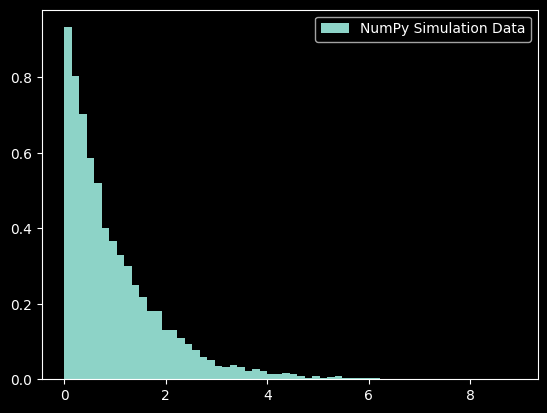

In [56]:
#5. 

@time_taken
def np_generator():
    numpy_function_times = np.random.exponential(scale=1/r,size=10000)
    return numpy_function_times

time,numpy_function_times= np_generator()

plt.figure()
plt.hist(numpy_function_times,bins=60,density=True,label="NumPy Simulation Data")
plt.legend()
plt.show()


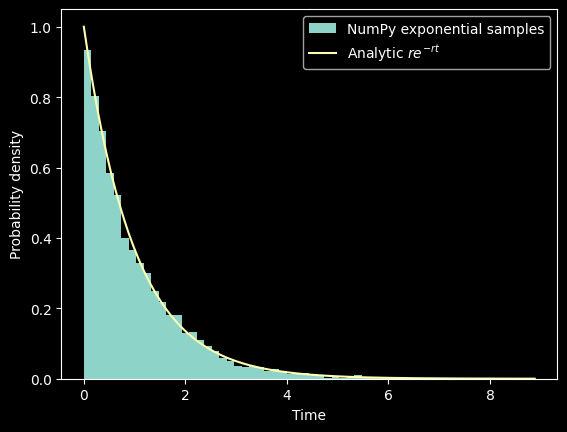

In [57]:
#6. 

plt.figure()
plt.hist(numpy_function_times, bins=60, density=True, label="NumPy exponential samples")

t_np = np.linspace(0, max(numpy_function_times), 200)
p_analytic_np = r * np.exp(-r * t_np)

plt.plot(t_np, p_analytic_np, label="Analytic $r e^{-rt}$")
plt.xlabel("Time")
plt.ylabel("Probability density")
plt.legend()
plt.show()


ANS: Yes it does match with the NumPy's Histogram really well. NumPy behaves as in theory.

Note: scipy.stats has the Poisson distribution, that you can generate random samples from

In [58]:
# 7. 

import scipy.stats as stats

In [59]:
# 8. 

# For a single single random number
r = 4;T = 5

mu = r*T

poisson_random_number = stats.poisson.rvs(mu=mu,size=1)
print(poisson_random_number)
print(f"mu = {mu}")

[25]
mu = 20


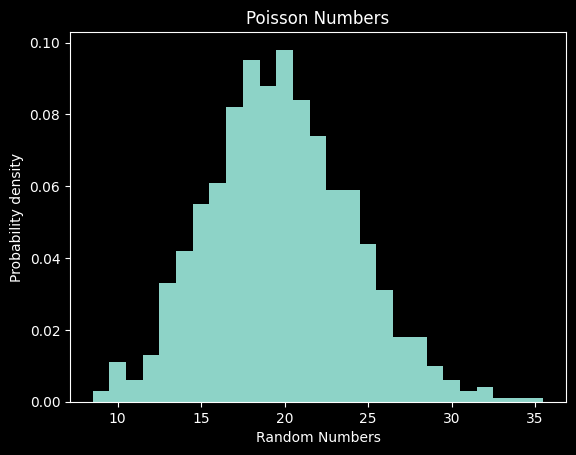

In [60]:
# 9. 

plt.figure()
poisson_random_numbers = stats.poisson.rvs(mu=mu,size=1_000)

# Discrete distribution, so bins should be integers
bins = np.arange(min(poisson_random_numbers), max(poisson_random_numbers) + 2) - 0.5
plt.hist(poisson_random_numbers,bins=bins,density=True,label="Poisson Random Numbers")

plt.xlabel("Random Numbers")

plt.ylabel("Probability density")
plt.title("Poisson Numbers")
plt.show()


ANS: For a Poisson process the mean and variance are both equal to $\mu$. With
1,000 samples, the sample mean and sample variance fluctuate around the true
value $mu$, but by the law of large numbers they are close to $mu$, as seen
in the output.

NOTE: I initally put the bins as 60, and on inspection I saw that the data naturally had only 8 discrete Values in x. This made me curious, so I searched online and found the above formula to use for discrete distribution. This is so I don't have to hard code things.

In [61]:
# 3.10 Mean and Variance
print(f"Mean: {np.mean(poisson_random_numbers):.2f} (Expected {mu})")
print(f"Var: {np.var(poisson_random_numbers):.2f} (Expected {mu})")


Mean: 19.77 (Expected 20)
Var: 18.46 (Expected 20)


ANS: They Match really well, why???

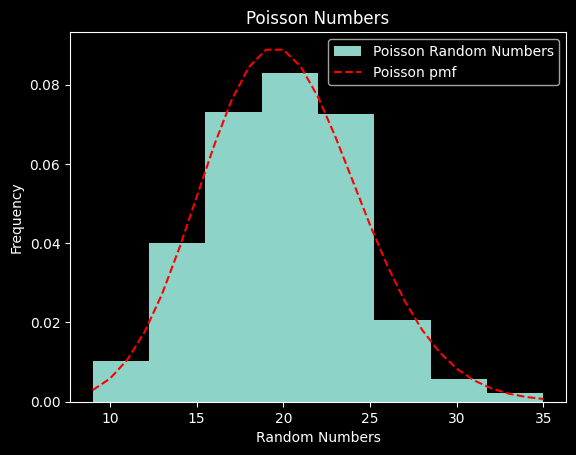

In [62]:
# 11. 


plt.hist(poisson_random_numbers,bins=8,density=True,label="Poisson Random Numbers")
k = np.arange(min(poisson_random_numbers), max(poisson_random_numbers) + 1) 

probability_mass_function = stats.poisson.pmf(k,mu)
plt.plot(k,probability_mass_function,'r--',label="Poisson pmf")

plt.xlabel("Random Numbers")

plt.ylabel("Frequency")
plt.title("Poisson Numbers")
plt.legend()
plt.show()



Ans: They Mostly Match, the poisson random Numbers are slightly sqwed to the right but this is till a great match. I noticed that if I Increase the mu, the values are also move to the right. Which makes sense. 

Ask: How do I make sure the legend and the graph do not interfere?


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ahila\AppData\Local\Temp\ipykernel_27892\3625135045.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, stats.poisson.pmf(x, mu), '-', label=f"$\mu={mu}$")
C:\Users\ahila\AppData\Local\Temp\ipykernel_27892\3625135045.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, stats.poisson.pmf(x, mu), '-', label=f"$\mu={mu}$")


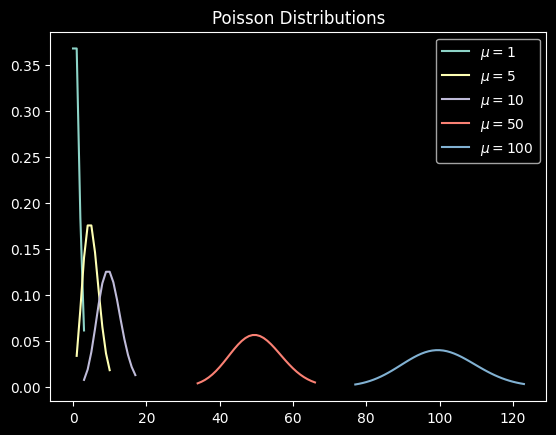

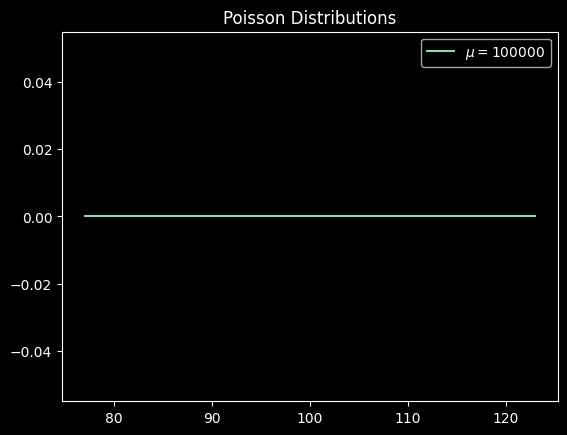

In [63]:
plt.figure()
mu_list = [1, 5, 10, 50,100]
for mu in mu_list:
    x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
    plt.plot(x, stats.poisson.pmf(x, mu), '-', label=f"$\mu={mu}$")
plt.legend()
plt.title("Poisson Distributions")
plt.show()

mu = 100000
plt.plot(x, stats.poisson.pmf(x, mu), '-', label=f"$\mu={mu}$")
plt.legend()
plt.title("Poisson Distributions")
plt.show()



Ans: I already answered this in 11., but again, as I increase mu (the mean) the distribution's FWHM increases, the peak height of the distribution decreases. 

As we can see, for extremely small values of mu, the distribution is nearly a delta function, straight on the y axis, as we increase the value of mu, the distribution approaches a flat line on the x axis.

### Task 4. 

In [64]:
#1. 
a = 1
# Difference between a walk and a step is, in 1 walk, you do N steps
# so walks is no of repetition

# Pseudo COde. We want a generator to generate N(steps) numbers and repeat this walks number of times. 
# This Generator must only choose randomly between -1 and + 1

walks_nos = 10_000
N_list = [10,20,30,40,50,100,200]

# This above track could have worked but it would have been long. 
# If we are already told we need random numbers with the size = (N steps,walks_no), 
# we can put this into the np.random.choice

def random1D_walk(N,a=1,walks_nos=walks_nos):
    steps = np.random.choice([-a,+a],size=(N,walks_nos))

    displacements = np.sum(steps, axis=0) ### ASKKKKKKKK
    return displacements


steps_10 = random1D_walk(10)
steps_20 = random1D_walk(20)
steps_30 = random1D_walk(30)
steps_40 = random1D_walk(40)
steps_50 = random1D_walk(50)
steps_100 = random1D_walk(100)
steps_200 = random1D_walk(200)



In [ ]:
# 2. Mean Displacement
displacement_list = [steps_10,steps_20,steps_30,steps_40,steps_50,steps_100,steps_200]
N_list = [10,20,30,40,50,100,200]
i = -1

for displacemen,N in zip(displacement_list, N_list):
    i += 1
    mean_disp_endToend = (np.mean(displacemen))
    
    print(f"N={N_list[i]}  ---- Mean End to End Displacement=   {mean_disp_endToend:.3f} | Abs Distance {abs(mean_disp_endToend):.3f}")

# 


N=10  ---- Mean End to End Displacement=   -0.011 | Abs Distance 0.011
N=20  ---- Mean End to End Displacement=   0.006 | Abs Distance 0.006
N=30  ---- Mean End to End Displacement=   -0.007 | Abs Distance 0.007
N=40  ---- Mean End to End Displacement=   -0.004 | Abs Distance 0.004
N=50  ---- Mean End to End Displacement=   -0.169 | Abs Distance 0.169
N=100  ---- Mean End to End Displacement=   0.012 | Abs Distance 0.012
N=200  ---- Mean End to End Displacement=   -0.009 | Abs Distance 0.009


Not the most efficient but gets the job done

3. I expected the mean to approach zero as we take more Steps, but there is some reason why it goes near zero at N = 40 a and increases a little. Maybe just random fluctuations and some systematic noise? This is regardless of how many times I run the program

N=10  ---- Mean squared End-to-end displacement = 10.075
N=20  ---- Mean squared End-to-end displacement = 19.876
N=30  ---- Mean squared End-to-end displacement = 29.366
N=40  ---- Mean squared End-to-end displacement = 40.834
N=50  ---- Mean squared End-to-end displacement = 49.687
N=100  ---- Mean squared End-to-end displacement = 100.340
N=200  ---- Mean squared End-to-end displacement = 192.542


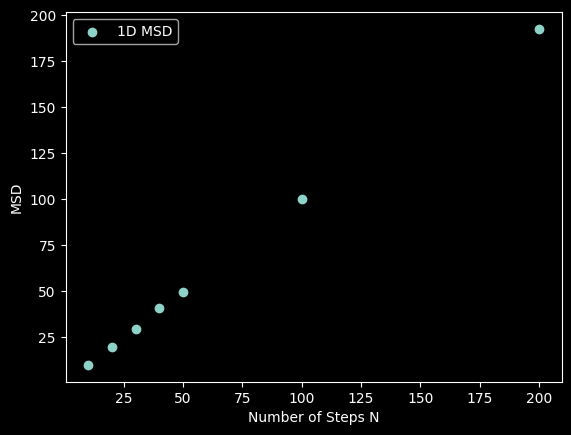

In [70]:
#4.

i = -1
msd = [] # List to store Mean Squared Displacements

for displacemen,N in zip(displacement_list, N_list):
    i += 1
    mean_sqdisp_endToend = (np.mean(displacemen**2))
    msd.append(mean_sqdisp_endToend)
    
    print(f"N={N_list[i]}  ---- Mean squared End-to-end displacement = {mean_sqdisp_endToend:.3f}")


# msd vs N
plt.scatter(N_list, msd, label="1D MSD")
plt.legend()
plt.xlabel("Number of Steps N")
plt.ylabel("MSD")
plt.show()



NOTE: MSD growing


#### 5. Deviation Math

a) Because each step has $dx_i = \pm a$, as $N$ grows large the expected displacement must approach zero. We take almost equal numbers of steps left and right, so
$$
\sum_{i=1}^{N} \langle dx_i \rangle = 0 = \langle r(N) \rangle.
$$

b) Since steps are uncorrelated, one step does not affect another, giving
$$
\langle r(N)^2 \rangle = \sum_{i=1}^{N} \langle dx_i^2 \rangle + \sum_{i \ne j} \langle dx_i dx_j \rangle.
$$
Using the facts that $\langle dx_i \cdot dx_j \rangle = \langle dx_i \rangle \langle dx_j \rangle = 0$ and $(\pm 1)^2 = 1$ so $\langle dx_i^2 \rangle = 1$, we obtain
$$
\langle r(N)^2 \rangle = \sum_{i=1}^{N} 1 + \sum_{i \ne j} \langle dx_i dx_j \rangle = N.
$$

**Finally,** $\langle r(N)^2 \rangle = N$.


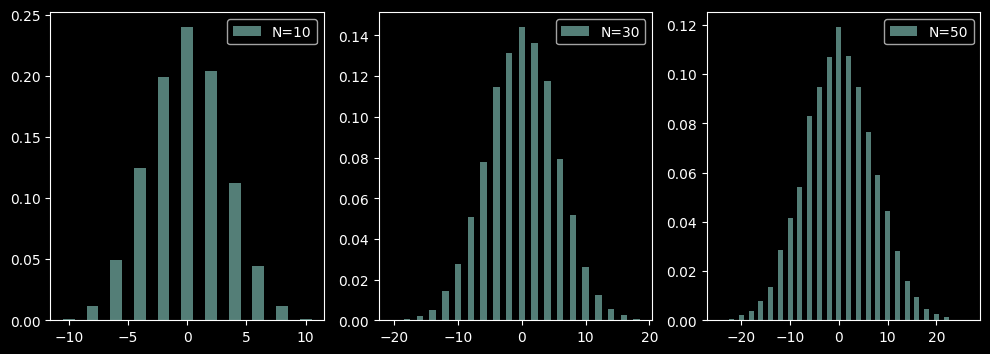

In [67]:
# 6. 

plt.figure(figsize=(12, 4))
N_plot = [10, 30, 50]

for i, N in enumerate(N_plot): # Gives a pair of index and the value as: 
    # (0, N_plot[0]) ... (3, N_plot[3]) ...
    plt.subplot(1, 3, i+1)
    data = random1D_walk(N)
    

    # Histogram
    # Binning: ensure bins cover the range. Steps are integers, displacements differ by 2
    bins = np.arange(min(data), max(data) + 2) - 0.5
    plt.hist(data, bins=bins, density=True, alpha=0.6, label=f"N={N}")
    
    plt.legend()

#plt.tight_layout()
plt.show()

Ans: Yes, As the Values for N increaes, more and more the histogram becomes smoother and clearly approaches a Gaussian (normal) shape.
We see the peak remains centered at 0,
while the width of the distribution grows.

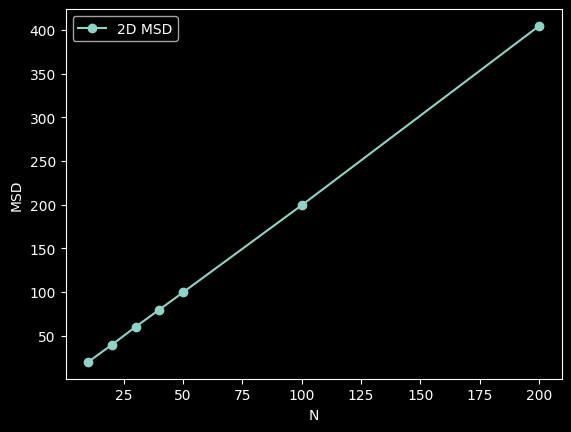

In [75]:

def simulate_2d_walks(N, num_walks=10000):
    # X steps and Y steps are independent 1D walks
    x_disp = random1D_walk(N, a=1, walks_nos=num_walks)
    y_disp = random1D_walk(N, a=1, walks_nos=num_walks)
    r2 = x_disp**2 + y_disp**2
    return r2


msd_2d = []
for N in N_list:
    r2 = simulate_2d_walks(N)
    msd_2d.append(np.mean(r2))

plt.figure()
plt.plot(N_list, msd_2d, 'o-', label="2D MSD")
plt.xlabel("N")
plt.ylabel("MSD")
plt.legend()
plt.show()

#### Task 5: Wrap up

5.1 Confusing Questions

Task 3 Q1 and Task 4 Q5, I felt like they caught me a little off guard. 


5.2 General Feedback


Random numbers and Pseudo Random numbers is a very very interesting concept to me, I felt like we could have removed 1/4 of the Assignment and motivate the Activity Guide through more lecture and contact time :) 

Also: An Introduction to Thermal Physics Textbook by Daniel V. Schroeder, explores the concept of a 1D walk by using the analogy of a Drunk Person trying to walk. In his textbook, we reach the same conclusion too! Just though this could be useful too!! 
